In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import joblib


**CARREGAMENTO DO DATASET**

In [ ]:
df1 = pd.read_csv("personality_datasert.csv")

In [119]:
df1

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,3.0,Yes,2.0,0.0,Introvert


**PRÉ-PROCESSAMENTO E EXPLORAÇÃO**

In [5]:
df_one_hot = df1.copy()

In [7]:
df_one_hot.dropna(inplace=True)

In [8]:
df_one_hot['Personality'] = df_one_hot['Personality'].map({'Introvert': 0, 'Extrovert': 1})

In [9]:
df_one_hot['Stage_fear'] = df_one_hot['Stage_fear'].map({'No': 0, 'Yes': 1})

In [10]:
df_one_hot['Drained_after_socializing'] = df_one_hot['Drained_after_socializing'].map({'No': 0, 'Yes': 1})

In [120]:
df_one_hot

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,0,4.0,6.0,0,13.0,5.0,1
1,9.0,1,0.0,0.0,1,0.0,3.0,0
2,9.0,1,1.0,2.0,1,5.0,2.0,0
3,0.0,0,6.0,7.0,0,14.0,8.0,1
4,3.0,0,9.0,4.0,0,8.0,5.0,1
...,...,...,...,...,...,...,...,...
2895,3.0,0,7.0,6.0,0,6.0,6.0,1
2896,3.0,0,8.0,3.0,0,14.0,9.0,1
2897,4.0,1,1.0,1.0,1,4.0,0.0,0
2898,11.0,1,1.0,3.0,1,2.0,0.0,0


In [64]:
df_one_hot.corr()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
Time_spent_Alone,1.000000,0.834469,-0.718139,-0.735247,0.832117,-0.701665,-0.718072,-0.712468
Stage_fear,0.834469,1.000000,-0.831737,-0.855403,0.956518,-0.810046,-0.826483,-0.847467
Social_event_attendance,-0.718139,-0.831737,1.000000,0.731941,-0.830611,0.718518,0.727732,0.721520
Going_outside,-0.735247,-0.855403,0.731941,1.000000,-0.852969,0.718327,0.754758,0.739251
Drained_after_socializing,0.832117,0.956518,-0.830611,-0.852969,1.000000,-0.805234,-0.823028,-0.845388
Friends_circle_size,-0.701665,-0.810046,0.718518,0.718327,-0.805234,1.000000,0.690381,0.687203
Post_frequency,-0.718072,-0.826483,0.727732,0.754758,-0.823028,0.690381,1.000000,0.721062
Personality,-0.712468,-0.847467,0.721520,0.739251,-0.845388,0.687203,0.721062,1.000000


In [ ]:
X = df_one_hot.drop('Personality', axis=1)
y = df_one_hot['Personality']

In [ ]:
normalizador = sk.preprocessing.MinMaxScaler()
X_norm = normalizador.fit_transform(X)
joblib.dump(normalizador, 'normalizador_scaler.pkl')

**DIVISÃO DOS DADOS**

In [17]:
X_treino, X_teste, y_treino, y_teste = sk.model_selection.train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [18]:
pd.DataFrame(X_treino)

,0,1,2,3,4,5,6
0,0.272727,0.0,0.5,0.857143,0.0,0.666667,0.9
1,0.545455,1.0,0.3,0.428571,1.0,0.066667,0.0
2,0.909091,1.0,0.2,0.285714,1.0,0.066667,0.0
3,0.818182,1.0,0.1,0.285714,1.0,0.200000,0.1
4,0.909091,1.0,0.0,0.000000,1.0,0.266667,0.1
...,...,...,...,...,...,...,...
2315,0.181818,0.0,0.7,0.571429,0.0,0.800000,0.8
2316,0.000000,0.0,0.7,0.571429,0.0,0.933333,0.6
2317,1.000000,1.0,0.1,0.142857,1.0,0.266667,0.2
2318,0.909091,1.0,0.3,0.142857,1.0,0.333333,0.0


**CRIAÇÃO DE MODELOS**

**MLP**

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_treino, y_treino, epochs=30, batch_size=16, verbose=0) 
loss_mlp, accuracy_mlp = model.evaluate(X_teste, y_teste, verbose=0)
y_pred_proba_mlp = model.predict(X_teste)
y_pred_mlp = (y_pred_proba_mlp > 0.5).astype(int)

precision_mlp = precision_score(y_teste, y_pred_mlp)
recall_mlp = recall_score(y_teste, y_pred_mlp)
f1_mlp = f1_score(y_teste, y_pred_mlp)
roc_auc_mlp = roc_auc_score(y_teste, y_pred_proba_mlp)

print(f"MLP - Acurácia: {accuracy_mlp:.4f}")
print(f"MLP - Perda (Loss): {loss_mlp:.4f}")
print(f"MLP - Precisão: {precision_mlp:.4f}")
print(f"MLP - Recall: {recall_mlp:.4f}")
print(f"MLP - F1-Score: {f1_mlp:.4f}")
print(f"MLP - AUC-ROC: {roc_auc_mlp:.4f}")
model.save('model.keras')


--- Multi-Layer Perceptron (MLP) ---
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
MLP - Acurácia: 0.9293
MLP - Perda (Loss): 0.2412
MLP - Precisão: 0.9424
MLP - Recall: 0.9205
MLP - F1-Score: 0.9313
MLP - AUC-ROC: 0.9531


**SVM**

In [ ]:
svm_model = SVC(probability=True, random_state=42) 
svm_model.fit(X_treino, y_treino)

y_pred_svm = svm_model.predict(X_teste)
y_pred_proba_svm = svm_model.predict_proba(X_teste)[:, 1] 

accuracy_svm = accuracy_score(y_teste, y_pred_svm)
precision_svm = precision_score(y_teste, y_pred_svm)
recall_svm = recall_score(y_teste, y_pred_svm)
f1_svm = f1_score(y_teste, y_pred_svm)
roc_auc_svm = roc_auc_score(y_teste, y_pred_proba_svm)

print(f"SVM - Acurácia: {accuracy_svm:.4f}")
print(f"SVM - Precisão: {precision_svm:.4f}")
print(f"SVM - Recall: {recall_svm:.4f}")
print(f"SVM - F1-Score: {f1_svm:.4f}")
print(f"SVM - AUC-ROC: {roc_auc_svm:.4f}")
joblib.dump(svm_model, 'svm_model.pkl')


SVM - Acurácia: 0.9293
SVM - Precisão: 0.9424
SVM - Recall: 0.9205
SVM - F1-Score: 0.9313
SVM - AUC-ROC: 0.9441


['svm_model.pkl']

**RANDOM FOREST**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) 
rf_model.fit(X_treino, y_treino)
y_pred_rf = rf_model.predict(X_teste)
y_pred_proba_rf = rf_model.predict_proba(X_teste)[:, 1] 
accuracy_rf = accuracy_score(y_teste, y_pred_rf)
precision_rf = precision_score(y_teste, y_pred_rf)
recall_rf = recall_score(y_teste, y_pred_rf)
f1_rf = f1_score(y_teste, y_pred_rf)
roc_auc_rf = roc_auc_score(y_teste, y_pred_proba_rf)
print(f"Random Forest - Acurácia: {accuracy_rf:.4f}")
print(f"Random Forest - Precisão: {precision_rf:.4f}")
print(f"Random Forest - Recall: {recall_rf:.4f}")
print(f"Random Forest - F1-Score: {f1_rf:.4f}")
print(f"Random Forest - AUC-ROC: {roc_auc_rf:.4f}")
joblib.dump(rf_model, 'rf_model.pkl')

Random Forest - Acurácia: 0.9224
Random Forest - Precisão: 0.9356
Random Forest - Recall: 0.9139
Random Forest - F1-Score: 0.9246
Random Forest - AUC-ROC: 0.9488


['rf_model.pkl']

**MATRIZ DE CONFUSÂO**

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  


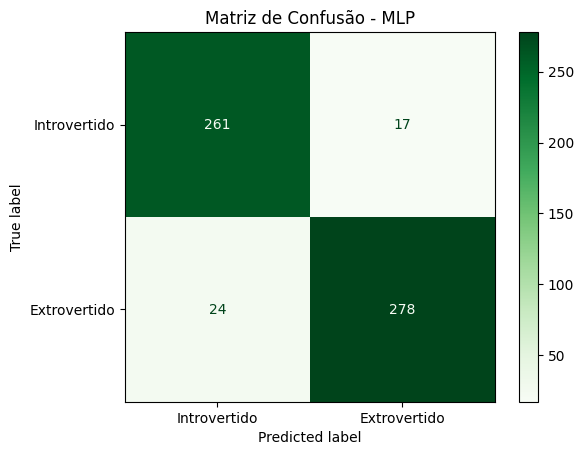

In [121]:
y_pred_proba_mlp = model.predict(X_teste)
y_pred_mlp = (y_pred_proba_mlp > 0.5).astype(int)
cm_mlp = confusion_matrix(y_teste, y_pred_mlp)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=["Introvertido", "Extrovertido"])
disp_mlp.plot(cmap=plt.cm.Greens)
plt.title('Matriz de Confusão - MLP')
plt.show()

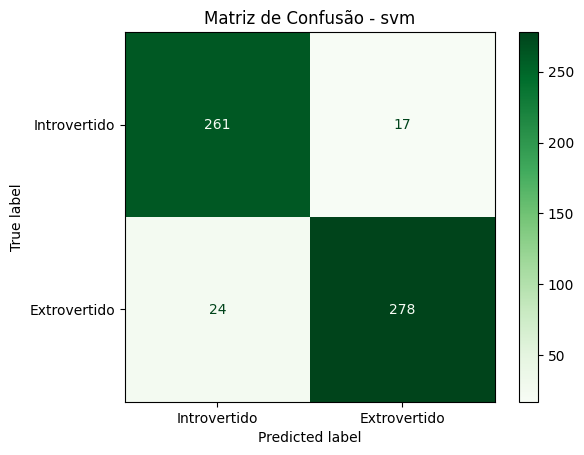

In [122]:
y_pred_proba_svm = svm_model.predict(X_teste)
y_pred_svm = (y_pred_proba_svm > 0.5).astype(int)

cm_svm = confusion_matrix(y_teste, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=["Introvertido", "Extrovertido"])
disp_svm.plot(cmap=plt.cm.Greens)
plt.title('Matriz de Confusão - svm')
plt.show()

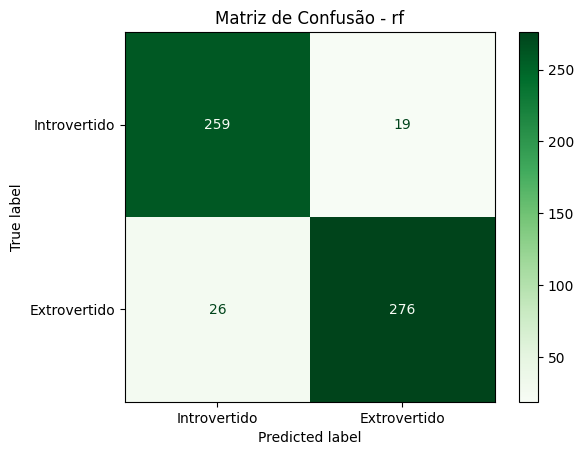

In [123]:
y_pred_proba_rf = rf_model.predict(X_teste)
y_pred_rf = (y_pred_proba_rf > 0.5).astype(int)
cm_rf = confusion_matrix(y_teste, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=["Introvertido", "Extrovertido"])
disp_rf.plot(cmap=plt.cm.Greens)
plt.title('Matriz de Confusão - rf')
plt.show()